# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

**Task 1**

У KNN расстояния между объектами одного класса должны быть минимальны. Для LR классы должны хорошо разделяться линией. Если в качестве выборки взять две параллельные прямые так, что точки самих прямых будут расположены дальше друг от друга, чем от соседних точек другой прямой, то KNN не справится с задачей, а линия регрессии без проблем разделит эти две прямые.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Нарисую сначала график с небольшим количеством точек, чтобы было видно, как они расположены.

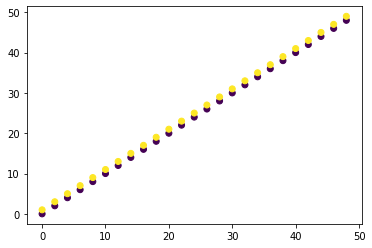

In [2]:
num_max = 50 #number of points

arr = np.array(range(0, num_max, 2))
x1 = arr.reshape(-1, 1)
y1 = arr.reshape(-1, 1)
line1 = np.hstack([x1, y1])

x2 = arr.reshape(-1, 1)
y2 = np.array([x+1 for x in x2]).reshape(-1, 1)
line2 = np.hstack([x2, y2])

X = np.concatenate((line1, line2))
y = np.concatenate((np.zeros(len(line1)), np.ones(len(line2))))
Xx = X[:,0] #x axis values
Xy = X[:,1] #y axis values
plt.scatter(Xx, Xy, c=y)

Теперь увеличим количество точек для моделей.

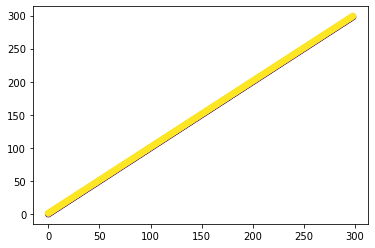

In [3]:
num_max = 300 #number of points

arr = np.array(range(0, num_max, 2))
x1 = arr.reshape(-1, 1)
y1 = arr.reshape(-1, 1)
line1 = np.hstack([x1, y1])

x2 = arr.reshape(-1, 1)
y2 = np.array([x+1 for x in x2]).reshape(-1, 1)
line2 = np.hstack([x2, y2])

X = np.concatenate((line1, line2))
y = np.concatenate((np.zeros(len(line1)), np.ones(len(line2))))
Xx = X[:,0] #x axis values
Xy = X[:,1] #y axis values
plt.scatter(Xx, Xy, c=y)

In [4]:
#let's mix it
import random
data = list(zip(X, y))
random.shuffle(data)
x_mas = []
y_mas = []
for i in data:
    x_mas.append(i[0])
    y_mas.append(i[1])
X_new = np.array(x_mas)
y_new = np.array(y_mas)

In [5]:
#split to train, test, val samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=23)

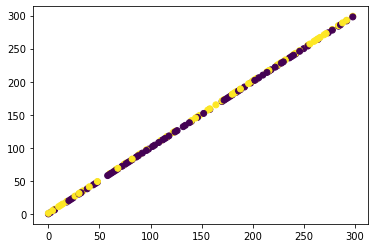

In [6]:
Xx_tr = X_train[:,0] #x axis values
Xy_tr = X_train[:,1] #y axis values
plt.scatter(Xx_tr, Xy_tr, c=y_train)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

Начнем с логистической регрессии

In [8]:
LR = LogisticRegression()

In [9]:
LR.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
LR.score(X, y)

1.0

In [11]:
accuracy_score(y_val, LR.predict(X_val))

1.0

Результат уже хороший, но проверим, что он не станет хуже при других параметрах.

In [12]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(LogisticRegression(penalty='l2', max_iter = 400, solver='lbfgs'), cv=5, param_grid={'C':np.linspace(0.1,1,10)}, scoring=acc_scorer, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished


In [13]:
LR_new = grid_obj.best_estimator_
LR_new.fit(X_train, y_train)
accuracy_score(y_val, LR_new.predict(X_val))

1.0

Теперь KNN

In [14]:
knn2 = KNeighborsClassifier(p=2)

In [15]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
accuracy_score(y_val, knn2.predict(X_val))

0.4126984126984127

In [18]:
knn = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)}, scoring='accuracy')
knn = knn.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
knn_new = knn.best_estimator_
knn_new.fit(X_train, y_train)
accuracy_score(y_val, knn_new.predict(X_val))

0.30158730158730157

Сравним точность полученных классификаторов на тестовой выборке

In [20]:
score_LR = accuracy_score(y_test, LR_new.predict(X_test))
score_knn = accuracy_score(y_test, knn_new.predict(X_test))

In [22]:
print('Score for LR on test data = ', score_LR)
print('Score for KNN on test data = ', score_knn)

Score for LR on test data =  1.0
Score for KNN on test data =  0.4777777777777778


Как видно из результатов, LR справился с задачей гораздо лучше KNN.

**Task 2**

Чтобы логистическая регрессия плохо себя показала, нужно распределить данные так, что провести прямую для разделения двух классов более менее равномерно было невозможно. Поэтому можно сгенерировать точки в форме какой-нибудь симметричной фигуры, например, ромба. Сделать таких ромба два - каждый отвечает за один класс. Если точки, принадлежащие одной фигуре, будут ближе друг к другу, чем к точкам другой фигуры, тогда KNN должен справится с отведением их к одному классу.

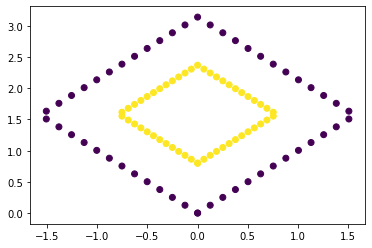

In [47]:
import numpy as np 
import pylab as py
N=50; Rp=1
theta=np.linspace(2*np.pi, 0, N+1, endpoint=True)
figure1=np.array([Rp*np.arcsin(np.sin(theta)),Rp*np.arccos(np.cos(theta))])

theta2=np.linspace(2*np.pi, 0, N+1, endpoint=True)
figure2=np.array([Rp*np.arcsin(np.sin(theta2)),Rp*np.arccos(np.cos(theta2))])/2
figure2[1] = figure2[1]+0.8

f1x = figure1[1]
f1y = figure1[0]

f1 = []
for i in range(len(f1x)):
    m = []
    m.append(f1x[i])
    m.append(f1y[i])
    f1.append(m)

f2x = figure2[1]
f2y = figure2[0]

f2 = []
for i in range(len(f2x)):
    m = []
    m.append(f2x[i])
    m.append(f2y[i])
    f2.append(m)
    
X = np.concatenate((f1, f2))
y = np.concatenate((np.zeros(len(f1)), np.ones(len(f2))))

Xx = X[:,1] #x axis values
Xy = X[:,0] #y axis values
plt.scatter(Xx, Xy, c=y)

In [48]:
#let's mix it
import random
data = list(zip(X, y))
random.shuffle(data)
x_mas = []
y_mas = []
for i in data:
    x_mas.append(i[0])
    y_mas.append(i[1])
X_new = np.array(x_mas)
y_new = np.array(y_mas)

In [49]:
#split to train, test, val samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=23)

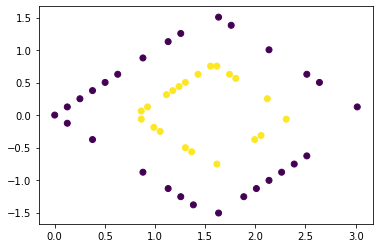

In [50]:
Xx_tr = X_train[:,0] #x axis values
Xy_tr = X_train[:,1] #y axis values
plt.scatter(Xx_tr, Xy_tr, c=y_train)

Начнем опять с регрессии

In [51]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.46938775510204084

In [52]:
accuracy_score(y_val, LR.predict(X_val))

0.36363636363636365

In [53]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(LogisticRegression(penalty='l2', max_iter = 400, solver='lbfgs'), cv=5, param_grid={'C':np.linspace(0.1,1,10)}, scoring=acc_scorer, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
LR_new = grid_obj.best_estimator_
LR_new.fit(X_train, y_train)
accuracy_score(y_val, LR_new.predict(X_val))

0.4090909090909091

Теперь KNN

In [55]:
knn2 = KNeighborsClassifier(p=2)
knn2.fit(X_train, y_train)
accuracy_score(y_val, knn2.predict(X_val))

0.9545454545454546

In [56]:
knn = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)}, scoring='accuracy')
knn = knn.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
knn_new = knn.best_estimator_
knn_new.fit(X_train, y_train)
accuracy_score(y_val, knn_new.predict(X_val))

1.0

Сравним точность предсказаний двух классификаторов на тестовой выборке.

In [58]:
score_LR = accuracy_score(y_test, LR_new.predict(X_test))
score_knn = accuracy_score(y_test, knn_new.predict(X_test))

print('Score for LR on test data = ', score_LR)
print('Score for KNN on test data = ', score_knn)

Score for LR on test data =  0.45161290322580644
Score for KNN on test data =  1.0


Видно, что KNN, в отличие от LR, с задачей справился отлично.

**Task 3**

В предыдущих классификаторах KNN по умолчанию использовался метод подсчета расстояния с евклидовой метрикой. Чтобы метрика с расчетом косинусного расстояния показала более хорошие результаты, это расстояние должно быть минимально для объектов одного класса, а это в свою очередь возможно, когда угол между векторами равен нулю, и они соответственно совпадают. Пример двух таких классов - прямые линии, которые были сгенерированы в первом задании. Попробуем использовать их и здесь.

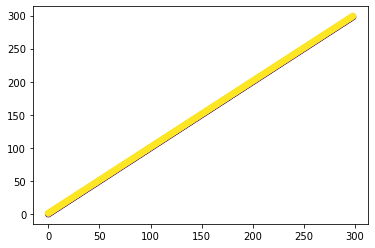

In [59]:
num_max = 300 #number of points

arr = np.array(range(0, num_max, 2))
x1 = arr.reshape(-1, 1)
y1 = arr.reshape(-1, 1)
line1 = np.hstack([x1, y1])

x2 = arr.reshape(-1, 1)
y2 = np.array([x+1 for x in x2]).reshape(-1, 1)
line2 = np.hstack([x2, y2])

X = np.concatenate((line1, line2))
y = np.concatenate((np.zeros(len(line1)), np.ones(len(line2))))
Xx = X[:,0] #x axis values
Xy = X[:,1] #y axis values
plt.scatter(Xx, Xy, c=y)

In [60]:
#let's mix it
import random
data = list(zip(X, y))
random.shuffle(data)
x_mas = []
y_mas = []
for i in data:
    x_mas.append(i[0])
    y_mas.append(i[1])
X_new = np.array(x_mas)
y_new = np.array(y_mas)

In [61]:
#split to train, test, val samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=23)

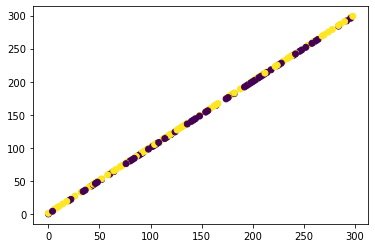

In [62]:
Xx_tr = X_train[:,0] #x axis values
Xy_tr = X_train[:,1] #y axis values
plt.scatter(Xx_tr, Xy_tr, c=y_train)

In [63]:
knn1 = KNeighborsClassifier(p=2)
knn1.fit(X_train, y_train)
accuracy_score(y_val, knn1.predict(X_val))

0.30158730158730157

In [64]:
knn = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)}, scoring='accuracy')
knn = knn.fit(X_train, y_train)
knn_eu = knn.best_estimator_
knn_eu.fit(X_train, y_train)
accuracy_score(y_val, knn_eu.predict(X_val))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.38095238095238093

In [65]:
knn2 = KNeighborsClassifier(metric='cosine')
knn2.fit(X_train, y_train)
accuracy_score(y_val, knn2.predict(X_val))

1.0

In [66]:
knn = GridSearchCV(KNeighborsClassifier(metric='cosine'), cv=5, param_grid={'n_neighbors':np.arange(1,30)}, scoring='accuracy')
knn = knn.fit(X_train, y_train)
knn_cos = knn.best_estimator_
knn_cos.fit(X_train, y_train)
accuracy_score(y_val, knn_cos.predict(X_val))

1.0

In [67]:
score_knn_eu = accuracy_score(y_test, knn_eu.predict(X_test))
score_knn_cos = accuracy_score(y_test, knn_cos.predict(X_test))

print('Score for KNN with euclidean distance on test data = ', score_knn_eu)
print('Score for KNN with cosine distance on test data = ', score_knn_cos)

Score for KNN with euclidean distance on test data =  0.37777777777777777
Score for KNN with cosine distance on test data =  1.0


По результатам видно, что KNN с расчетом косинусного расстояния выдал лучший результат.